![image](images/photo.jpg)

# HOUSE PRICES
# PART 1 - DATA ANAYSIS AND PREPROCESSING

---
### Table of contents
1. [INTRODUCTION](#1.-INTRODUCTION) <br>
2. [DATA ANALYSIS AND DESCRIPTION](#2.-DATA-ANALYSIS-AND-DESCRIPTION) <br>
3. [NUMERICAL FEATURES ANALYSIS](#3.-NUMERICAL-FEATURES-ANALYSIS) <br>
4. [CATEGORICAL FEATURES ANALYSIS](#4.-CATEGORICAL-FEATURES-ANALYSIS) <br>
5. [ANALYSIS OF INDIVIDUAL VARIABLES](#5.-ANALYSIS-OF-INDIVIDUAL-VARIABLES) <br>
6. [DATA PREPROCESSING](#6.-DATA-PREPROCESSING) <br>
7. [CORRELATION AMONG VARIABLES](#7.-CORRELATION-AMONG-VARIABLES) <br>

---
# 1. INTRODUCTION
## 1.1 Dataset info
The dataset used in the project come from: https://www.kaggle.com/harlfoxem/housesalesprediction <br>
It contains house sale prices for Washington State, which includes Seattle (USA). It includes homes sold between May 2014 and May 2015.

## 1.2 Python libraries

In [2]:
# Data analysis and processing
import pandas as pd
import numpy as np
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', 30)
pd.options.display.float_format = '{:.2f}'.format

## 1.3 Import dataset

In [3]:
df = pd.read_csv("data/kc_house_data.csv")

---
# 2. DATA ANALYSIS AND DESCRIPTION
## 2.1 Basic information about dataset
Dataset contains 21 columns and 21613 rows.

In [4]:
print("Dataframe shape:\n{}".format(df.shape))

Dataframe shape:
(21613, 21)


In [5]:
print("Feature names:\n{}".format(df.columns.values))

Feature names:
['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 2.2 Missing values
There are no missing values in dataset.

In [7]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## 2.3 Feature types
Dataset contains 21 features:
- 20 numerical features
- 1 categorical feature (string values)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 2.4 Unique values
Below you can see the number of unique values for each feature. <br>
Values are very diverse - starting from 2 and ending with 21436.

In [9]:
unique_Values =  df.nunique()
print("Count of unique values in each column :\n{}".format(unique_Values))

Count of unique values in each column :
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


---
# 3. NUMERICAL FEATURES ANALYSIS
## 3.1 Basic statistics

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


## 3.2 Histograms
Histograms for numerical variables are shown below.
"Id" and "date" variables were omitted because there is no point to analyze it that way. <br>
As the graphs show, variables have different distributions, some are close to normal and skewed.

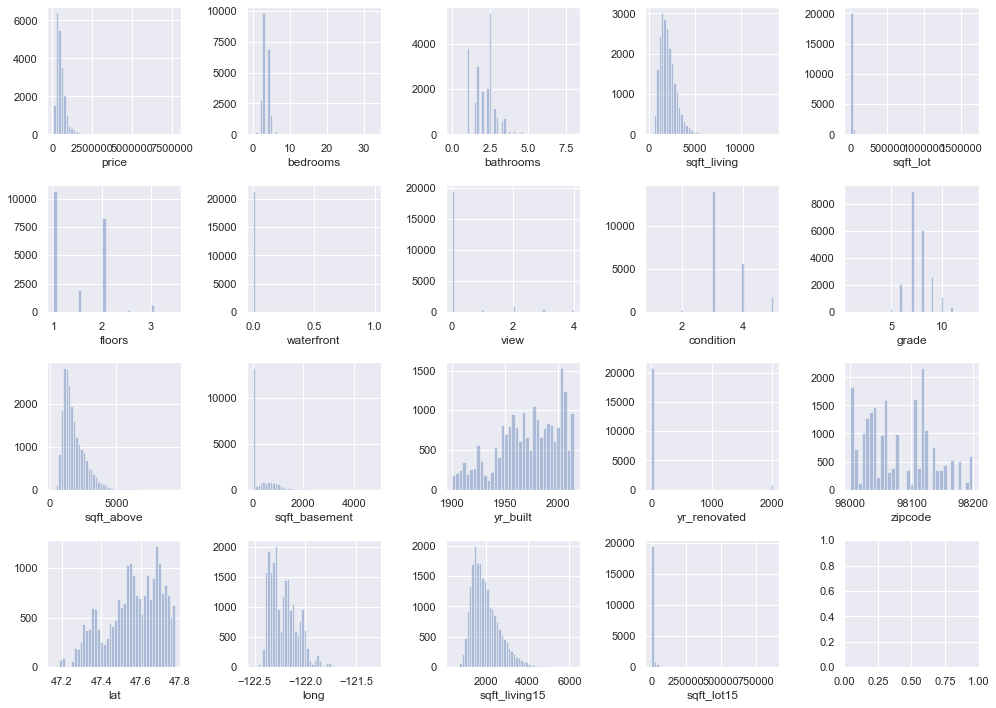

In [12]:
numeric_col = ['price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 
               'view','condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','zipcode', 
               'lat', 'long','sqft_living15', 'sqft_lot15']
sns.set()
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(14, 10))
for idx, feat in enumerate(numeric_col): 
    ax = axes[int(idx / 5), idx % 5] 
    sns.distplot(df[feat], 
                 kde=False, 
                 ax=ax)
fig.tight_layout()

## 3.3 Continous numerical variables - scatterplots
Scatter plots for continuous numeric variables are shown below. Some of the independent variables show a linear relationship with the dependent variable "price", they are among others: sqft_living, sqft_above.

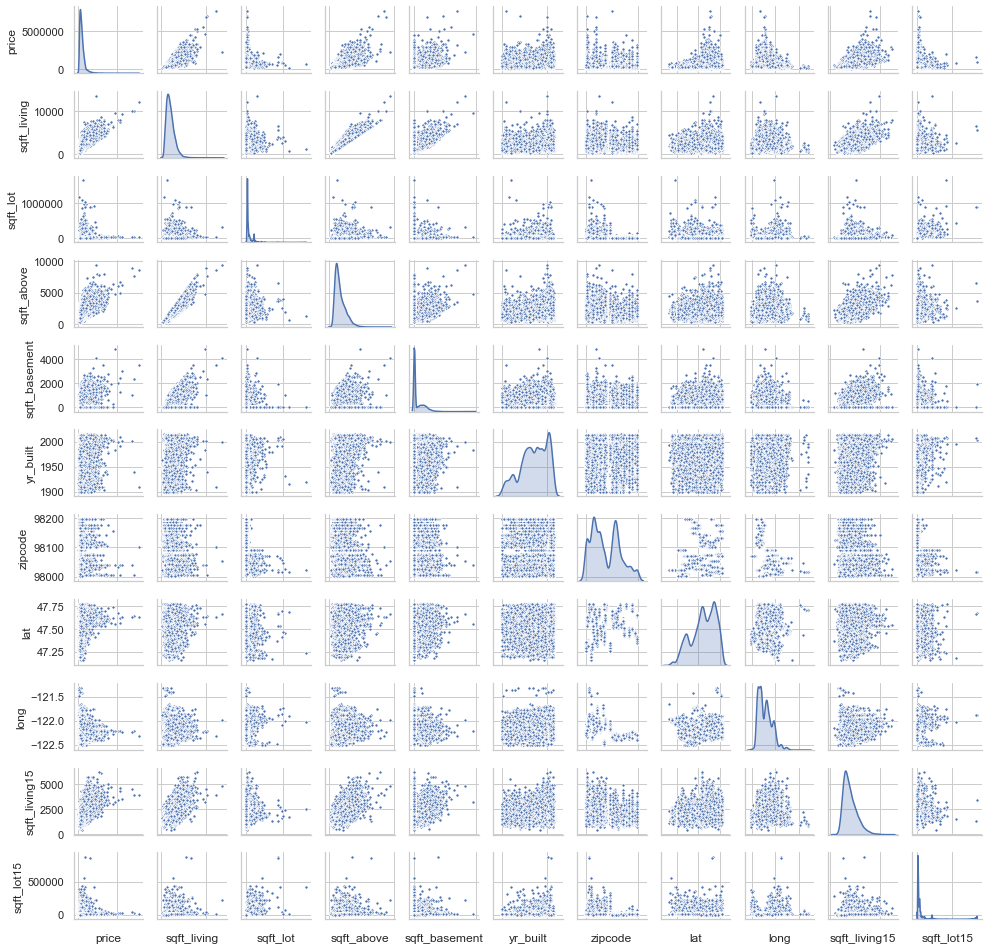

In [13]:
cont_col = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built','zipcode', 
            'lat','long', 'sqft_living15', 'sqft_lot15']
sns.set(style="whitegrid", font_scale=1)
grid = sns.pairplot(df[cont_col], 
                    height=1.2,
                    diag_kind = 'kde',
                    diag_kws=dict(shade=True),
                    plot_kws=dict(s=10) )
grid.set(xticklabels=[])

---
# 4. CATEGORICAL FEATURES ANALYSIS
## 4.1 Basic information
There is only one string variable in the dataset - "date" variable.

In [15]:
df.describe(include=['O']) 

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [16]:
df.date.value_counts()

20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150524T000000      1
20140727T000000      1
20141130T000000      1
20141102T000000      1
20150527T000000      1
Name: date, Length: 372, dtype: int64

---
# 5. ANALYSIS OF INDIVIDUAL VARIABLES

##  5.1 ID variable - duplicates investigation
The number of unique values of the ID variable is 21436, while the dataset contains 21613 observations. This means that this column contains duplicates.
In this situation, it is necessary to check which of the following scenarios we are dealing with:
1. There are duplicate observations in the set.
2. There are observations in the set with the same ID, but the values of other features for these observations differ from each other.

In [17]:
# Count of duplicate rows in dataset:
duplicates = df.duplicated().sum()
print("Count of duplicate rows in dataset :\n{}".format(duplicates))

Count of duplicate rows in dataset :
0


In [18]:
# Show observations with duplicated ID variable
dup_id = df.duplicated(subset = ["id"], keep=False)
df.loc[dup_id,:].sort_values(["id","date"]).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2496,1000102,20140916T000000,280000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2497,1000102,20150422T000000,300000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
16814,7200179,20141016T000000,150000.00,2,1.00,840,12750,1.00,0,0,3,6,840,0,1925,0,98055,47.48,-122.21,1480,6969
16815,7200179,20150424T000000,175000.00,2,1.00,840,12750,1.00,0,0,3,6,840,0,1925,0,98055,47.48,-122.21,1480,6969
11433,109200390,20140820T000000,245000.00,3,1.75,1480,3900,1.00,0,0,4,7,1480,0,1980,0,98023,47.30,-122.37,1830,6956
11434,109200390,20141020T000000,250000.00,3,1.75,1480,3900,1.00,0,0,4,7,1480,0,1980,0,98023,47.30,-122.37,1830,6956
12417,123039336,20140611T000000,148000.00,1,1.00,620,8261,1.00,0,0,3,5,620,0,1939,0,98106,47.51,-122.36,1180,8244
12418,123039336,20141208T000000,244900.00,1,1.00,620,8261,1.00,0,0,3,5,620,0,1939,0,98106,47.51,-122.36,1180,8244
7792,251300110,20140731T000000,225000.00,3,2.25,2510,12013,2.00,0,0,3,8,2510,0,1988,0,98003,47.35,-122.31,1870,8017
7793,251300110,20150114T000000,358000.00,3,2.25,2510,12013,2.00,0,0,3,8,2510,0,1988,0,98003,47.35,-122.31,1870,8017


The table above shows that some houses have been sold several times. Observations with the same ID differ from each other in the date and price. At first glance, you can see that these same houses had a tendency to get more expensive over time. The "date" variable may turn out to be important in the prediction process.

## 5.2 Price variable 
"Price" is a continuous variable that will be predicted later in the study. <br>
As the graphs below show, the variable's distribution is close to normal and it's right-skewed. In the further part of the study, the variable was transformed in order to eliminate the skewness.

In [20]:
df.price.describe()
print("Price variable - descriptive statistics:\n{}".format(df.price.describe()))

Price variable - descriptive statistics:
count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64



 mu = 540088.14 and sigma = 367118.70



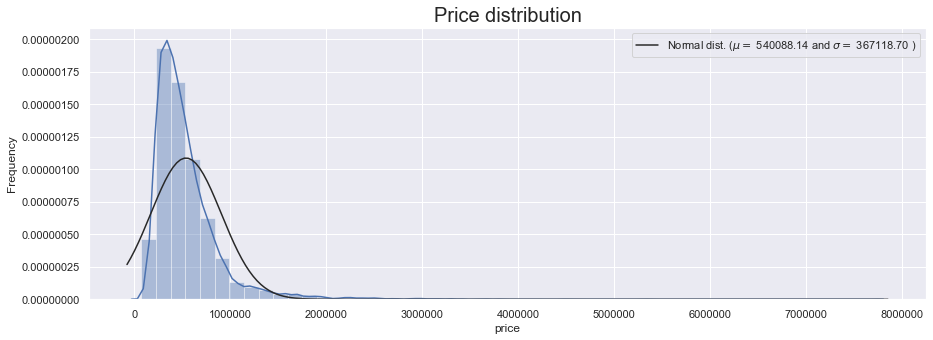

Skewness: 4.024069
Kurtosis: 34.585540


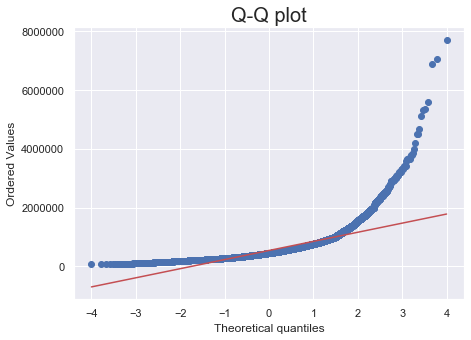

In [21]:
# Fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Distribution plot
sns.set()
plt.figure(figsize=(15, 5))
sns.distplot(df['price'] , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution', size=20)
plt.show()

# Skew and kurt
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

# QQ-plot
sns.set()
plt.figure(figsize=(7, 5))
res = stats.probplot(df['price'], plot=plt)
plt.title('Q-Q plot', size=20)
plt.show()

## 5.3 Price per square foot variable (added variable)

In order to better understand the relationships occurring in the data, additional variable was created - price per square foot. This variable has normal distribution, right-skewed. It's a typical shape for the price variables of all kinds of products.

In [23]:
# Copy dataset for analysis
df_analysis = df.copy()
# Create new variable - price_sqft
df_analysis['price_sqft'] = df_analysis['price'] / df_analysis['sqft_living']

Text(0.5, 1.0, 'Price per square foot - distribution plot')

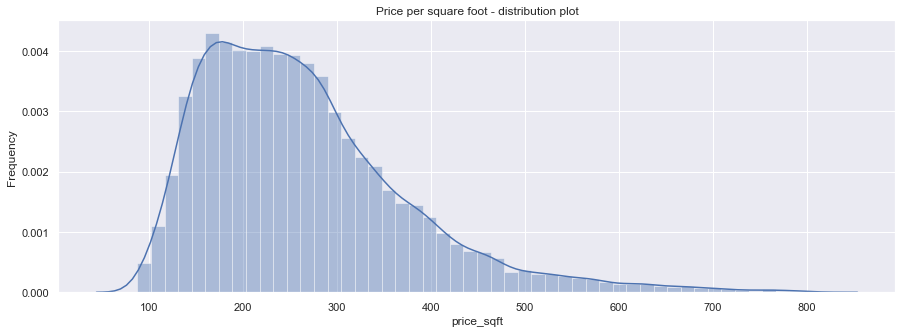

In [24]:
# price_sqft - distribution plot
sns.set()
plt.figure(figsize=(15, 5))
sns.distplot(df_analysis['price_sqft'])
plt.ylabel('Frequency')
plt.title('Price per square foot - distribution plot')

### Time series plots
The graphs below show time series for price per squate foot and three different variables analysed in groups.

In [25]:
# Transforming "date" column:
df_analysis['date'] = df_analysis['date'].str[:8]
df_analysis['date'] = pd.to_datetime(df_analysis['date'])
df_analysis['date'] = df_analysis['date'].dt.strftime('%Y/%m')

# Function for plotting time series for different aggregating variables
def plot_timeseries(df, date, price_var, aggr_var, aggr_border,label_all, label_above, label_below, ylabel, title):
    
    # Aggregate data 
    df_all = df[price_var].groupby(df[date]).mean()
    df_above = df[price_var][df[aggr_var] > aggr_border].groupby(df[date]).mean()
    df_below = df[price_var][df[aggr_var] <= aggr_border].groupby(df[date]).mean()

    # Plot time series
    sns.set(rc={'figure.figsize':(15, 4)})
    fig, ax = plt.subplots()
    ax.plot(df_all, marker='o', markersize=8, linestyle='-', linewidth=2, label=label_all)
    ax.plot(df_above, marker='o', markersize=8, linestyle='-', linewidth=2, label=label_above)
    ax.plot(df_below, marker='o', markersize=8, linestyle='-', linewidth=2, label=label_below)
    ax.legend()
    ax.set_ylabel(ylabel)
    ax.set_title(title, size = 20)

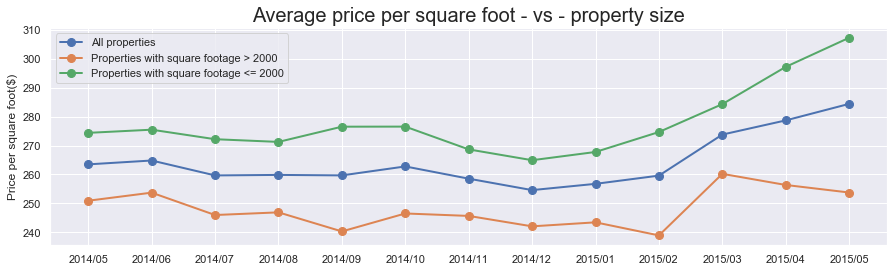

In [26]:
plot_timeseries(df_analysis, date = 'date', price_var = 'price_sqft', aggr_var='sqft_living', aggr_border=2000,
                label_all='All properties', label_above='Properties with square footage > 2000', 
                label_below='Properties with square footage <= 2000', 
                ylabel='Price per square foot($)', title='Average price per square foot - vs - property size')

#### Average price per square foot vs property size - findings:
- Average price per square foot of all properties tend to increase over time after December 2014
- Average price per square foot of properties smaller than 2000 sqf is approximately 10% higher than properties bigger than 2000 sqf

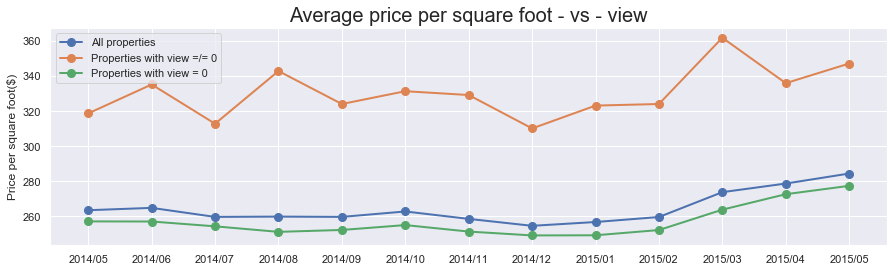

In [27]:
plot_timeseries(df_analysis, date = 'date', price_var = 'price_sqft', aggr_var='view', aggr_border=0,
                label_all='All properties', label_above='Properties with view =/= 0', 
                label_below='Properties with view = 0', 
                ylabel='Price per square foot($)', title='Average price per square foot - vs - view')

#### Average price per square foot vs view - findings:
- Average price per square foot of properties with view value other than 0 is approximately 30% higher than properties with a view value equel 0.
- Average price per square foot of property with a view value other than 0 is less stable over time than a properties with a view value of 0. This means that the price is subject to relatively large seasonal fluctuations.

In [28]:
# Extracting year from "date" column:
df_analysis['sales_year'] = pd.DatetimeIndex(df_analysis['date']).year
# Create property_age variable
df_analysis['property_age'] = df_analysis['sales_year'] - df_analysis['yr_built']

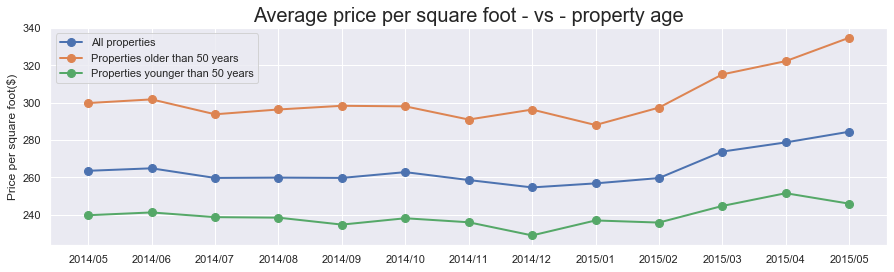

In [29]:
plot_timeseries(df_analysis, date = 'date', price_var = 'price_sqft', aggr_var='property_age', aggr_border=50,
                label_all='All properties', label_above='Properties older than 50 years', 
                label_below='Properties younger than 50 years', 
                ylabel='Price per square foot($)', title='Average price per square foot - vs - property age')

#### Average price per square foot vs property age - findings:
- Since January 2015 average price per square foot of real estate older than 50 years have increased sharply. The growth curve for these properties is much steeper than for properties younger than 50 years.
- Average price per square foot of properties older than 50 years is approximately 25% higher than properties younger than 50 years.

## 5.4 Longitude / Latitude variable
The scatterplot shown below indicates that the location of the house affects its price. Latitude plays an important role. <br>
In the center of the map you can see Seattle - the largest city in the area. Prices in Seattle are on average several times higher than on the outskirts of the Washington state.

Text(0.5, 1.0, 'Price per square foot vs house location')

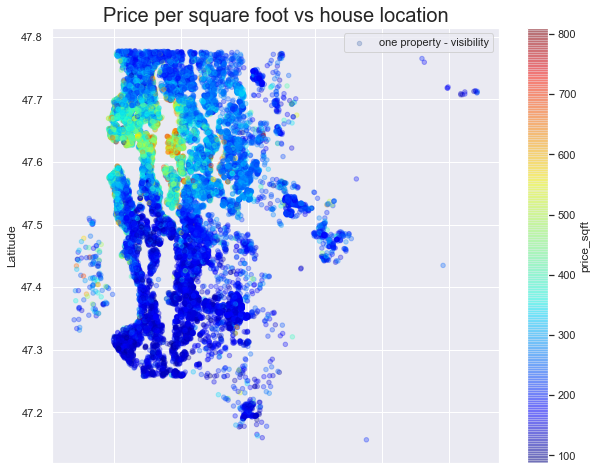

In [37]:
# Scatterplot - longitude and latitude
sns.set()
plot = df_analysis.plot.scatter(x='long', y='lat', c='price_sqft',
                               label='one property - visibility',
                               cmap=plt.get_cmap('jet'), 
                               colorbar=True, alpha=0.3, figsize=(10,8))
plot.legend()
plot.set_xlabel('Longitude')
plot.set_ylabel('Latitude')
plot.set_title('Price per square foot vs house location', size = 20)

## 5.5  Ordinal and categorical variables

Box plots presented below visually show the distribution of numerical data and skewness through displaying the data quartiles and averages in groups. <br>

Conclusions from the charts:
- Average prices for "bathroom" and "grade" variables tend to increase in groups. For example, as the slope of the land increases, the average property price increases. This implies a positive linear correlation of the "grade" variable with the dependent variable "price".
- There are outliers in the dataset (it can be observed for all studied variables).
- Variables "bathroom", "grade", "waterfront" show significant differences between the compared groups, while for variable "condition" these differences seem to be small.

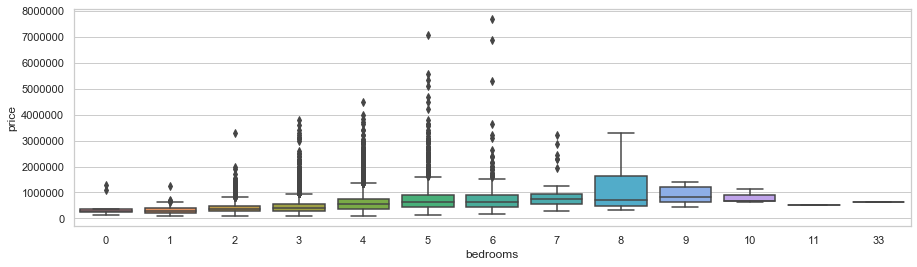

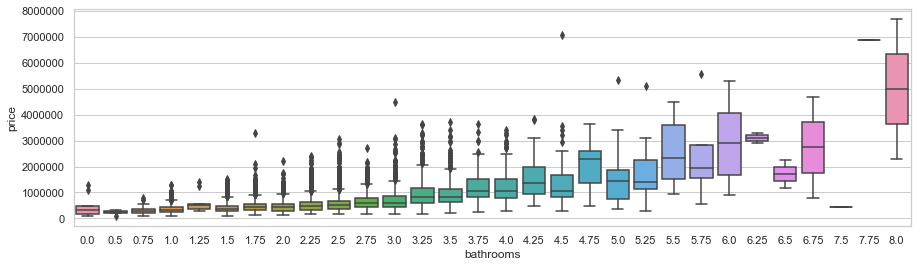

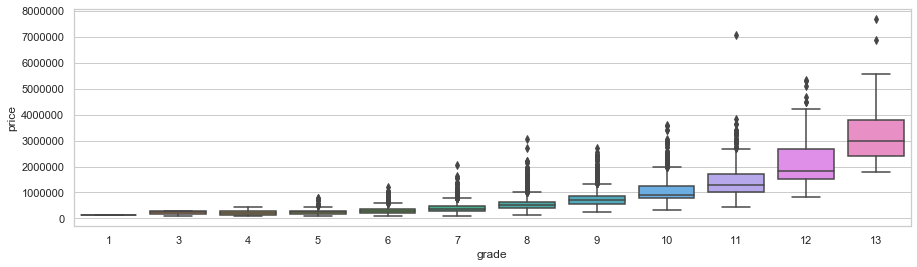

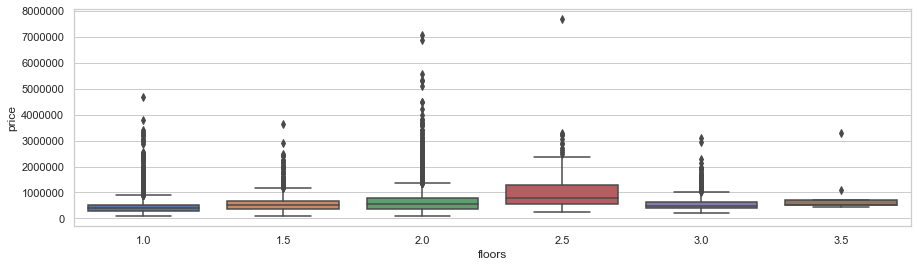

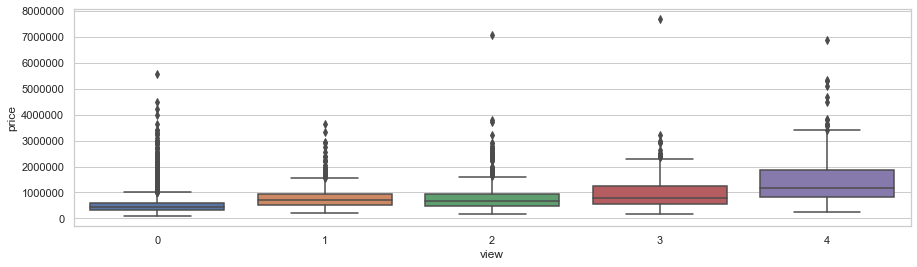

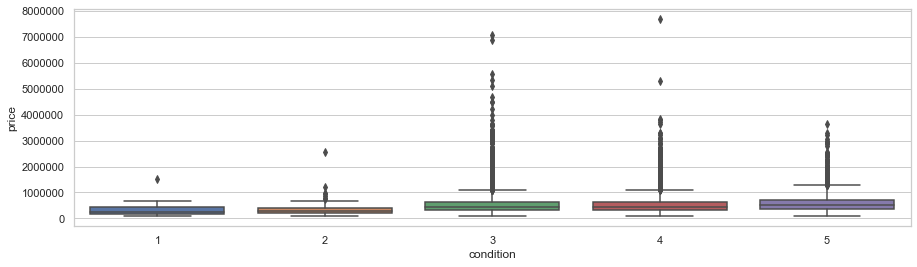

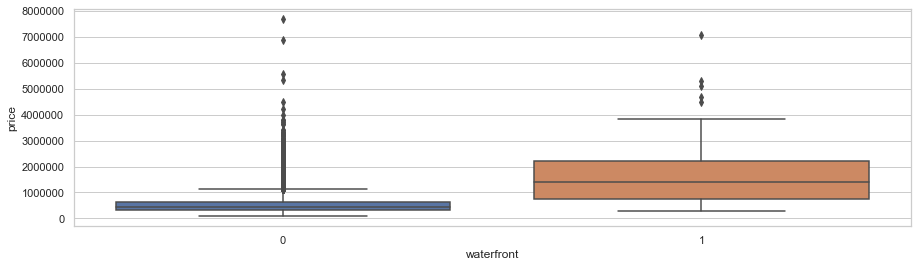

In [38]:
categorical_vars = ["bedrooms","bathrooms", "grade", "floors", "view", "condition", "waterfront"]

for i in categorical_vars:
    sns.set(style="whitegrid", font_scale=1)
    plt.figure(figsize=(15, 4))
    ax = sns.boxplot(x=i, y='price', data=df_analysis)

---
# 6. DATA PREPROCESSING

## 6.1 Drop ID column
The "id" variable serves only as observation identifier, therefore it was removed from the dataset.

In [39]:
df.drop(['id'], axis=1, inplace=True)
print("Dataframe shape after transformation:\n{}".format(df.shape))

Dataframe shape after transformation:
(21613, 20)


## 6.2 Create new variables - sales_year , sales_month
The "date" variable has been transformed - unnecessary characters have been removed and date has been transformed into a datetime format. <br>
Two new variables were created from the transformed variable: <br>
- sales_year - sales year
- sales_month - sales month

In [40]:
# Extracting date from "date" column:
df['date'] = df['date'].str[:8]
df['date']= pd.to_datetime(df['date'])

# Extracting year from "date" column:
df['sales_year'] = pd.DatetimeIndex(df['date']).year

# Extracting month from "date" column:
df['sales_month'] = pd.DatetimeIndex(df['date']).month

# Dropping "date" variable
df.drop(['date'], axis=1, inplace=True)

print("Dataframe shape after transformations:\n{}".format(df.shape))
df.head()

Dataframe shape after transformations:
(21613, 21)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,2014,10
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,12
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,2015,2
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,2014,12
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,2015,2


## 6.3 Create new variable - property_age
The new "property_age" variable represents the age of the property at the time of sale. <br>
After this transformation, the variable indicating the year of construction ("yr_biult") was removed to avoid duplication of information.

In [42]:
# Create property_age variable
df['property_age'] = df['sales_year'] - df['yr_built']

# Dropping "yr_built" variable
df.drop(['yr_built'], axis=1, inplace=True)

print("Dataframe shape after transformations:\n{}".format(df.shape))
df.head()

Dataframe shape after transformations:
(21613, 21)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month,property_age
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,0,98178,47.51,-122.26,1340,5650,2014,10,59
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1991,98125,47.72,-122.32,1690,7639,2014,12,63
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,0,98028,47.74,-122.23,2720,8062,2015,2,82
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,0,98136,47.52,-122.39,1360,5000,2014,12,49
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,0,98074,47.62,-122.05,1800,7503,2015,2,28


## 6.4 Create new variable - renovated_bin
The variable "yr_renovated" has been converted to the binary variable "renovated_bin" with the following values: <br>
- 1 - if the property has ever been renovated
- 0 - if the property has never been renovated

After the transformation, variable "yr_renovated" was removed.

In [44]:
# Create renovated_bin variable
df['renovated_bin'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Dropping "yr_renovated" variable
df.drop(['yr_renovated'], axis=1, inplace=True)

print("Dataframe shape after transformations:\n{}".format(df.shape))
df.head()

Dataframe shape after transformations:
(21613, 21)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month,property_age,renovated_bin
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,98178,47.51,-122.26,1340,5650,2014,10,59,0
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,98125,47.72,-122.32,1690,7639,2014,12,63,1
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,98028,47.74,-122.23,2720,8062,2015,2,82,0
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,98136,47.52,-122.39,1360,5000,2014,12,49,0
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,98074,47.62,-122.05,1800,7503,2015,2,28,0


## 6.5 Pivot "view" variable
In the original dataset, "view" variable takes 5 numerical values. It characterizes the view and should be treated as a categorical variable. That's why this variable has been transformed into dummy variables.

In [45]:
# Creating dummy variables and joining tables
view_trans = pd.get_dummies(df.view, prefix = 'view')
df = df.join(view_trans)

# Dropping "view" variable
df.drop(['view'], axis=1, inplace=True)

print("Dataframe shape after transformations:\n{}".format(df.shape))
df.head()

Dataframe shape after transformations:
(21613, 25)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month,property_age,renovated_bin,view_0,view_1,view_2,view_3,view_4
0,221900.00,3,1.00,1180,5650,1.00,0,3,7,1180,0,98178,47.51,-122.26,1340,5650,2014,10,59,0,1,0,0,0,0
1,538000.00,3,2.25,2570,7242,2.00,0,3,7,2170,400,98125,47.72,-122.32,1690,7639,2014,12,63,1,1,0,0,0,0
2,180000.00,2,1.00,770,10000,1.00,0,3,6,770,0,98028,47.74,-122.23,2720,8062,2015,2,82,0,1,0,0,0,0
3,604000.00,4,3.00,1960,5000,1.00,0,5,7,1050,910,98136,47.52,-122.39,1360,5000,2014,12,49,0,1,0,0,0,0
4,510000.00,3,2.00,1680,8080,1.00,0,3,8,1680,0,98074,47.62,-122.05,1800,7503,2015,2,28,0,1,0,0,0,0


## 6.6 Create binary variable "price_bin"
"price_bin" variable will be used later in the classification process. <br>
It was created based on the "price" variable:
- if the property cost more than 600,000, - price_bin is equel 1
- if the property is cheaper than 600,000 - price_bin is equal 0

In [46]:
# Creating price_bin variable indicating if price is above of below 600,000$
df.loc[df['price'] <= 600000, 'price_bin'] = 0
df.loc[df['price'] > 600000, 'price_bin'] = 1

# Counts of unique values
value_counts = df['price_bin'].value_counts(normalize=True)
print("Normlized counts of unique values:\n{}".format(value_counts))

Normlized counts of unique values:
0.00   0.71
1.00   0.29
Name: price_bin, dtype: float64


## 6.7 Transforming price variable (fixing skew)
The "price" variable is right skewed. Most of Machine Learning models do not deal very well with non-normal distributions. Therefore, a logarithmic transformation was performed on the "price" variable (natural logarithm of one plus the input value).

In [47]:
# transform skewed feature: log(1+x)
df["price"] = np.log1p(df["price"])

Distribution and Q-Q plots for the transformed "price" variable is presented below. <br>
After logarithmic transformation, variable distribution is close to normal.


 mu = 13.05 and sigma = 0.53



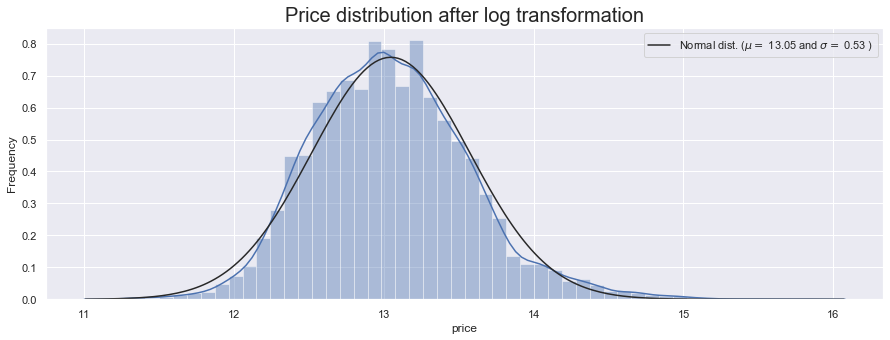

Skewness: 0.428077
Kurtosis: 0.691857


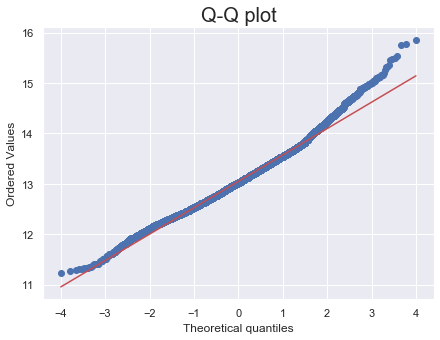

In [48]:
# Fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Distribution plot
sns.set()
plt.figure(figsize=(15, 5))
sns.distplot(df['price'] , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution after log transformation', size=20)
plt.show()

# Skew and kurt
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

# QQ-plot
sns.set()
plt.figure(figsize=(7, 5))
res = stats.probplot(df['price'], plot=plt)
plt.title('Q-Q plot', size =20)
plt.show()

## 6.8 Transforming numeric variables (fixing skew)
The distributions of some numerical variables are not normal, some variables are skewed. <br>
Below you can see skewness for continuous numeric variables. It follows that 7 numerical variables show strong skewness (greater than 1):
- sqft_lot
- sqft_lot15
- bedrooms
- sqft_basement
- sqft_living
- sqft_above
- sqft_living15 <br>

These variables were transformed using Box-Cox transformation in order to obtain a distribution close to normal.

In [49]:
# Select numerical independent features
numeric_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
               'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15','sqft_lot15','sales_year','sales_month', 
               'property_age']
# Features skewness
skew_features = df[numeric_col].apply(lambda x: skew(x)).sort_values(ascending=False)
print("Skewness of numerical features:\n{}".format(skew_features))

Skewness of numerical features:
sqft_lot        13.06
sqft_lot15       9.51
bedrooms         1.97
sqft_basement    1.58
sqft_living      1.47
sqft_above       1.45
sqft_living15    1.11
condition        1.03
long             0.88
grade            0.77
sales_year       0.76
floors           0.62
bathrooms        0.51
property_age     0.47
zipcode          0.41
sales_month      0.06
lat             -0.49
dtype: float64


In [50]:
# Select highly skewed features
high_skew_features = skew_features[skew_features > 1]
skew_index = high_skew_features.index

# Transform highly skewed features (Box-Cox transformation)
for i in skew_index:
     df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

/Users/kingamianowana/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Below you can find the skewness after performing Box-Cox transformation.

In [51]:
# Skewness of numerical independent  features after transformation
skew_features = df[numeric_col].apply(lambda x: skew(x)).sort_values(ascending=False)
print("Skewness of numerical features after transformation:\n{}".format(skew_features))

Skewness of numerical features after transformation:
sqft_basement    0.97
long             0.88
grade            0.77
sales_year       0.76
condition        0.70
floors           0.62
bathrooms        0.51
property_age     0.47
zipcode          0.41
sales_month      0.06
bedrooms         0.02
sqft_living15    0.00
sqft_above       0.00
sqft_living     -0.00
sqft_lot        -0.06
sqft_lot15      -0.07
lat             -0.49
dtype: float64


---
# 7. CORRELATION AMONG VARIABLES

Pearson correlation matrix for all (transformed) variables in the dataset is shown below.
The most linearly correlated with the "price" variable are following independent variables:
- grade - 0.7 (possitive correlation)
- sqft_living - 0.68 (possitive correlation)
- sqft_living15 - 0.6 (possitive correlation)
- sqft_above - 0.58 (possitive correlation)

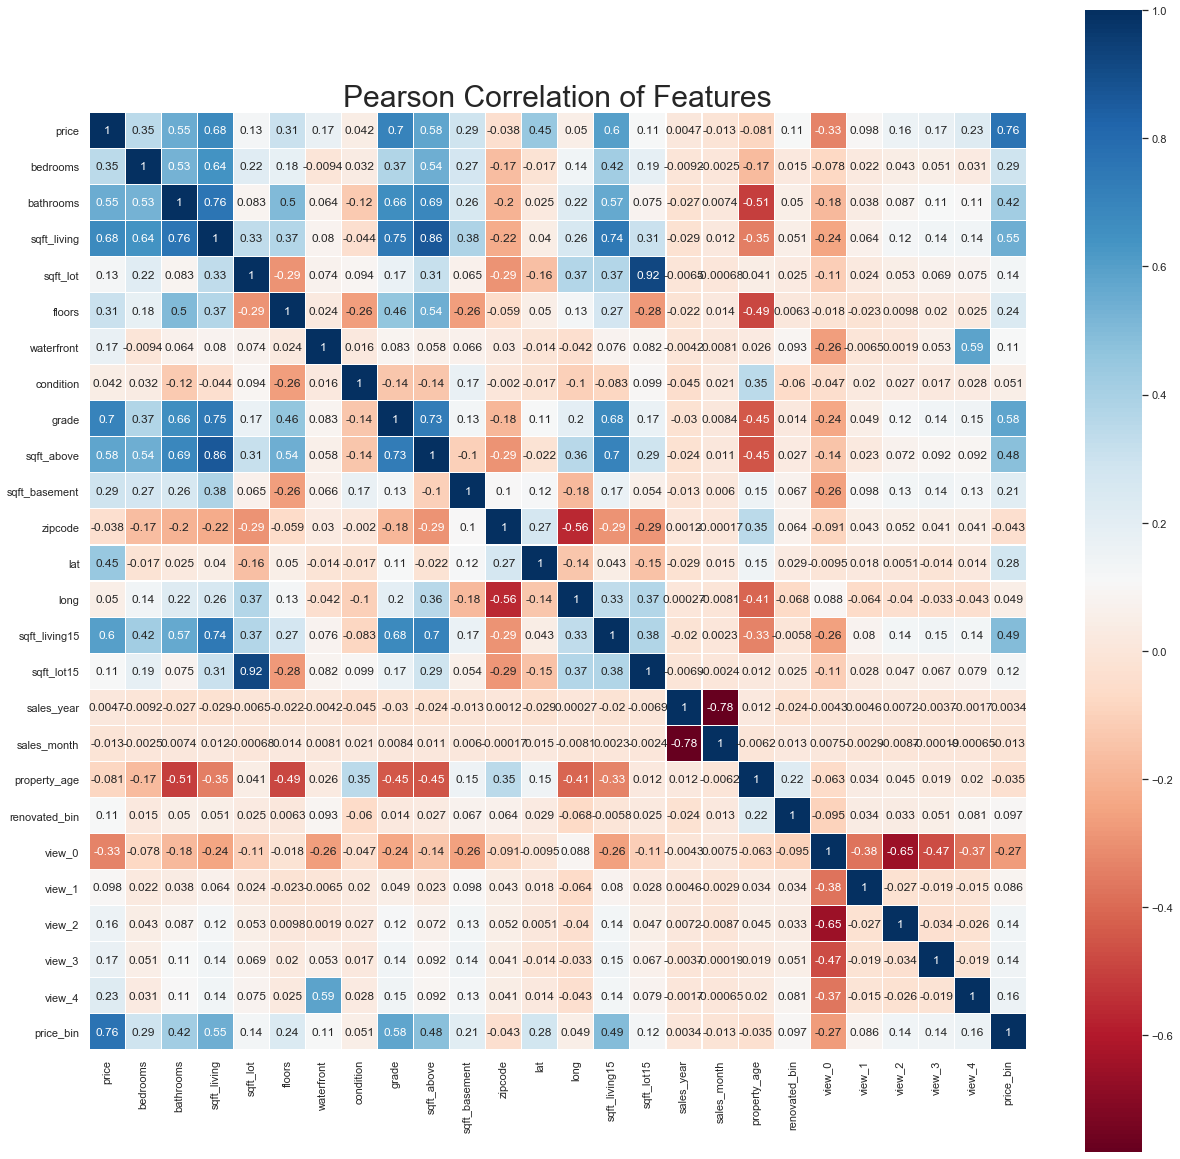

In [53]:
plt.figure(figsize=(21, 21))
colormap = plt.cm.RdBu
plt.title('Pearson Correlation of Features', y=1, size=30)
sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

---
#### Export dataset

In [54]:
df.to_csv('data/kc_house_data_transformed.csv', index=False)